In [19]:
#import libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [20]:
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/winequalityN.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [21]:
#feature variables
x=shuffle(df.drop(['quality'], axis=1))
#target variable
y=shuffle(df.quality)

In [22]:
#split and encode dataset
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4, stratify=y)
#one hot encode lables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
# Build NN model
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential([
   Dense(16, activation='relu', input_dim=12),
   Dense(10,activation='softmax')
 ]);

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                208       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

classifier.compile(optimizer = Adam(learning_rate=0.01), loss=CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [25]:
history=classifier.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_data=(x_test, y_test), verbose=2)

Epoch 1/100
162/162 - 1s - loss: 2.7321 - accuracy: 0.3630 - val_loss: 1.4348 - val_accuracy: 0.3271 - 874ms/epoch - 5ms/step
Epoch 2/100
162/162 - 0s - loss: 1.3822 - accuracy: 0.3920 - val_loss: 1.3310 - val_accuracy: 0.3759 - 288ms/epoch - 2ms/step
Epoch 3/100
162/162 - 0s - loss: 1.4431 - accuracy: 0.3837 - val_loss: 1.3194 - val_accuracy: 0.4362 - 273ms/epoch - 2ms/step
Epoch 4/100
162/162 - 0s - loss: 1.4342 - accuracy: 0.3764 - val_loss: 1.4825 - val_accuracy: 0.3256 - 255ms/epoch - 2ms/step
Epoch 5/100
162/162 - 0s - loss: 1.3501 - accuracy: 0.4036 - val_loss: 1.3006 - val_accuracy: 0.4138 - 257ms/epoch - 2ms/step
Epoch 6/100
162/162 - 0s - loss: 1.3151 - accuracy: 0.4154 - val_loss: 1.3348 - val_accuracy: 0.4308 - 295ms/epoch - 2ms/step
Epoch 7/100
162/162 - 0s - loss: 1.3163 - accuracy: 0.4087 - val_loss: 1.3222 - val_accuracy: 0.4362 - 264ms/epoch - 2ms/step
Epoch 8/100
162/162 - 0s - loss: 1.3083 - accuracy: 0.4152 - val_loss: 1.2957 - val_accuracy: 0.4362 - 273ms/epoch - 2

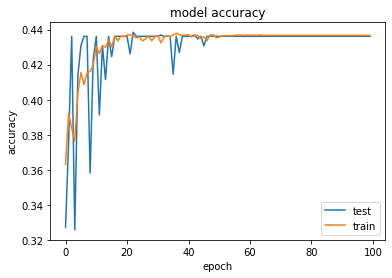

In [29]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='lower right')
plt.show()

In [30]:
# try cross validation
!pip install scikeras
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from scikeras.wrappers import KerasClassifier

xcv = x
ycv = to_categorical(y)

my_nn = KerasClassifier(classifier, epochs=40, batch_size=32, verbose=0)

cross_val_score(my_nn, xcv, ycv, cv=5)

INFO:tensorflow:Assets written to: ram:///tmp/tmpelg22o8e/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmpgx2ff4de/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmptaa6ci4n/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmp57b_sgly/assets
INFO:tensorflow:Assets written to: ram:///tmp/tmp8dwj6vh_/assets


array([0.43155452, 0.43111455, 0.43575851, 0.45278638, 0.43188854])